In [1]:
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

# Grab descriptions

In [3]:
#jpgs
with open('../data/jpgURL.pkl', 'rb') as picklefile:
    jpgdata=pickle.load(picklefile)
del jpgdata[2665] 

print(len(jpgdata))
print(jpgdata[:5])


3800
['https://images.metmuseum.org/CRDImages/ma/mobile-large/DP324638.jpg', 'https://images.metmuseum.org/CRDImages/as/mobile-large/DT8397.jpg', 'https://images.metmuseum.org/CRDImages/ma/mobile-large/DP249696.jpg', 'https://images.metmuseum.org/CRDImages/as/mobile-large/DP222326_CRD.jpg', 'https://images.metmuseum.org/CRDImages/ma/mobile-large/1986.323.1 - color.jpg']


In [146]:
photos=[]

len(jpgdata)
for jpg in jpgdata:
    photos.append(jpg.split('/')[-1])
    
print(len(photos))   
print(photos[:5])


3800
['DP324638.jpg', 'DT8397.jpg', 'DP249696.jpg', 'DP222326_CRD.jpg', '1986.323.1 - color.jpg']


In [147]:
pd.set_option('max_colwidth',100)
df2 = pd.DataFrame({'image': photos})
df2.head()


,image
0,DP324638.jpg
1,DT8397.jpg
2,DP249696.jpg
3,DP222326_CRD.jpg
4,1986.323.1 - color.jpg


In [148]:
with open('../data/siteURL.pkl', 'rb') as picklefile:
    sitedata=pickle.load(picklefile)
del sitedata[2665] 

print(len(sitedata))
print(sitedata[:5])


3800
['https://www.metmuseum.org/art/collection/search/638131', 'https://www.metmuseum.org/art/collection/search/41504', 'https://www.metmuseum.org/art/collection/search/488916', 'https://www.metmuseum.org/art/collection/search/75680', 'https://www.metmuseum.org/art/collection/search/484506']


In [149]:
pd.set_option('max_colwidth',100)
df1 = pd.DataFrame({'url': sitedata})
df1.head()


,url
0,https://www.metmuseum.org/art/collection/search/638131
1,https://www.metmuseum.org/art/collection/search/41504
2,https://www.metmuseum.org/art/collection/search/488916
3,https://www.metmuseum.org/art/collection/search/75680
4,https://www.metmuseum.org/art/collection/search/484506


In [4]:
with open('../data/desc.pkl', 'rb') as picklefile: 
    data = pickle.load(picklefile)
print(len(data))
#print(data)


3800


In [151]:
data1=pd.DataFrame(data)
data1.head()


,AccessionNumber,Artist,Blurb,Date,Medium
0,2014.142,"Bumpei Usui (American (born Japan), Nagano 1898–1994 New York)",The playful experimentation with perspective and proportions in this depiction of men and boys a...,1925,Oil on canvas
1,1986.267.156,"Wang Zhen (Chinese, 1867–1938)","A successful Shanghai businessman as well as a devout Buddhist, Wang Zhen is best known for his ...",dated 1928,Hanging scroll; ink and color on paper
2,56.205.2,"Willem de Kooning (American (born The Netherlands), Rotterdam 1904–1997 East Hampton, New York)","Easter Monday, named for the day on which the painting was completed in 1956, is the largest of ...",1955–56,Oil and newspaper transfer on canvas
3,2005.411.16.63,"Xie Zhiliu (Chinese, 1910–1997)","Although he was well versed in Western methods of rendering spatial recession, Xie's ability to ...",Datable to the 1930s,Sheet from a sketchbook; pencil on paper
4,1986.323.1,"Anne Ryan (American, Hoboken, New Jersey 1889–1954 Morristown, New Jersey)",,1948,Oil on canvas


In [152]:
pd.set_option('max_colwidth',100)
#frames = [data1, df1]
#result = pd.concat(frames)
#result

df3=pd.concat([data1, df1, df2], axis=1)
df3.head()


,AccessionNumber,Artist,Blurb,Date,Medium,url,image
0,2014.142,"Bumpei Usui (American (born Japan), Nagano 1898–1994 New York)",The playful experimentation with perspective and proportions in this depiction of men and boys a...,1925,Oil on canvas,https://www.metmuseum.org/art/collection/search/638131,DP324638.jpg
1,1986.267.156,"Wang Zhen (Chinese, 1867–1938)","A successful Shanghai businessman as well as a devout Buddhist, Wang Zhen is best known for his ...",dated 1928,Hanging scroll; ink and color on paper,https://www.metmuseum.org/art/collection/search/41504,DT8397.jpg
2,56.205.2,"Willem de Kooning (American (born The Netherlands), Rotterdam 1904–1997 East Hampton, New York)","Easter Monday, named for the day on which the painting was completed in 1956, is the largest of ...",1955–56,Oil and newspaper transfer on canvas,https://www.metmuseum.org/art/collection/search/488916,DP249696.jpg
3,2005.411.16.63,"Xie Zhiliu (Chinese, 1910–1997)","Although he was well versed in Western methods of rendering spatial recession, Xie's ability to ...",Datable to the 1930s,Sheet from a sketchbook; pencil on paper,https://www.metmuseum.org/art/collection/search/75680,DP222326_CRD.jpg
4,1986.323.1,"Anne Ryan (American, Hoboken, New Jersey 1889–1954 Morristown, New Jersey)",,1948,Oil on canvas,https://www.metmuseum.org/art/collection/search/484506,1986.323.1 - color.jpg


In [153]:
df4=df3[df3['Blurb'].map(len) > 0]
df4.reset_index().head()


,index,AccessionNumber,Artist,Blurb,Date,Medium,url,image
0,0,2014.142,"Bumpei Usui (American (born Japan), Nagano 1898–1994 New York)",The playful experimentation with perspective and proportions in this depiction of men and boys a...,1925,Oil on canvas,https://www.metmuseum.org/art/collection/search/638131,DP324638.jpg
1,1,1986.267.156,"Wang Zhen (Chinese, 1867–1938)","A successful Shanghai businessman as well as a devout Buddhist, Wang Zhen is best known for his ...",dated 1928,Hanging scroll; ink and color on paper,https://www.metmuseum.org/art/collection/search/41504,DT8397.jpg
2,2,56.205.2,"Willem de Kooning (American (born The Netherlands), Rotterdam 1904–1997 East Hampton, New York)","Easter Monday, named for the day on which the painting was completed in 1956, is the largest of ...",1955–56,Oil and newspaper transfer on canvas,https://www.metmuseum.org/art/collection/search/488916,DP249696.jpg
3,3,2005.411.16.63,"Xie Zhiliu (Chinese, 1910–1997)","Although he was well versed in Western methods of rendering spatial recession, Xie's ability to ...",Datable to the 1930s,Sheet from a sketchbook; pencil on paper,https://www.metmuseum.org/art/collection/search/75680,DP222326_CRD.jpg
4,8,1986.267.155,"Wang Zhen (Chinese, 1867–1938)","The strong, even brushline Wang Zhen learned from Wu Changshi (1844–1927) is evident in this exu...",dated 1917,Hanging scroll; ink and color on paper,https://www.metmuseum.org/art/collection/search/49630,1986_267_155_O.jpg


In [154]:
######
df4.iloc[277]

AccessionNumber                                                                                                 55.179
Artist                                                                                  Kay Sage (American, 1898–1963)
Blurb              One of the most prominent women associated with Surrealism in the United States, Kay Sage made t...
Date                                                                                                              1955
Medium                                                                                                   Oil on canvas
url                                                             https://www.metmuseum.org/art/collection/search/488856
image                                                                                                     DT212135.jpg
Name: 906, dtype: object

In [155]:
blurbs=[]

count = 0
for entry in data:
    if len(entry['Blurb']) > 0:
        #print(entry['Blurb'])
        blurbs.append(entry['Blurb'])
        count += 1
print(count)        

1106


In [156]:
len(blurbs)

1106

In [157]:
blurbs[0]

'The playful experimentation with perspective and proportions in this depiction of men and boys absorbed in various tasks related to furniture manufacture fills the canvas with frenetic energy. Details, such as the wide range of tools and machinery that animate the interior, reveal Usui’s own extensive knowledge of woodworking. Following his immigration to New York from Japan, Usui integrated into the city’s art community through his trade as a frame maker, through which he met many leading contemporary painters.'

# fit a single description

In [158]:
# fit a single description
blurbs[0]

'The playful experimentation with perspective and proportions in this depiction of men and boys absorbed in various tasks related to furniture manufacture fills the canvas with frenetic energy. Details, such as the wide range of tools and machinery that animate the interior, reveal Usui’s own extensive knowledge of woodworking. Following his immigration to New York from Japan, Usui integrated into the city’s art community through his trade as a frame maker, through which he met many leading contemporary painters.'

In [159]:
#setence or word tokenization needed
doc=[]
#word tokenization
words = word_tokenize(blurbs[0])
print(words)

doc.append(words)


['The', 'playful', 'experimentation', 'with', 'perspective', 'and', 'proportions', 'in', 'this', 'depiction', 'of', 'men', 'and', 'boys', 'absorbed', 'in', 'various', 'tasks', 'related', 'to', 'furniture', 'manufacture', 'fills', 'the', 'canvas', 'with', 'frenetic', 'energy', '.', 'Details', ',', 'such', 'as', 'the', 'wide', 'range', 'of', 'tools', 'and', 'machinery', 'that', 'animate', 'the', 'interior', ',', 'reveal', 'Usui', '’', 's', 'own', 'extensive', 'knowledge', 'of', 'woodworking', '.', 'Following', 'his', 'immigration', 'to', 'New', 'York', 'from', 'Japan', ',', 'Usui', 'integrated', 'into', 'the', 'city', '’', 's', 'art', 'community', 'through', 'his', 'trade', 'as', 'a', 'frame', 'maker', ',', 'through', 'which', 'he', 'met', 'many', 'leading', 'contemporary', 'painters', '.']


In [160]:
print(doc)
print(len(doc))
#print(len(words))

#print(len(sentences))

[['The', 'playful', 'experimentation', 'with', 'perspective', 'and', 'proportions', 'in', 'this', 'depiction', 'of', 'men', 'and', 'boys', 'absorbed', 'in', 'various', 'tasks', 'related', 'to', 'furniture', 'manufacture', 'fills', 'the', 'canvas', 'with', 'frenetic', 'energy', '.', 'Details', ',', 'such', 'as', 'the', 'wide', 'range', 'of', 'tools', 'and', 'machinery', 'that', 'animate', 'the', 'interior', ',', 'reveal', 'Usui', '’', 's', 'own', 'extensive', 'knowledge', 'of', 'woodworking', '.', 'Following', 'his', 'immigration', 'to', 'New', 'York', 'from', 'Japan', ',', 'Usui', 'integrated', 'into', 'the', 'city', '’', 's', 'art', 'community', 'through', 'his', 'trade', 'as', 'a', 'frame', 'maker', ',', 'through', 'which', 'he', 'met', 'many', 'leading', 'contemporary', 'painters', '.']]
1


# tf-idf

In [161]:
vectorizer = TfidfVectorizer(stop_words="english") #max_df=0.95, min_df=2,
doc_vectors = vectorizer.fit_transform(words)

# NMF

In [43]:
n_components=3
n_top_words = 5

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [45]:
#fit the NMF model
model = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf = model.fit(doc_vectors) #learn a NMF model for the data in doc_vectors


In [46]:
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: usui york energy integrated immigration
Topic #1: integrated york japan immigration furniture
Topic #2: woodworking experimentation interior integrated immigration



In [47]:
tp = nmf.fit_transform(doc_vectors)

In [48]:
len(tp)

90

In [56]:
tp[40:50]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.76366673,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

# fit a few descriptions

In [142]:
blurbs[0:1]

['The playful experimentation with perspective and proportions in this depiction of men and boys absorbed in various tasks related to furniture manufacture fills the canvas with frenetic energy. Details, such as the wide range of tools and machinery that animate the interior, reveal Usui’s own extensive knowledge of woodworking. Following his immigration to New York from Japan, Usui integrated into the city’s art community through his trade as a frame maker, through which he met many leading contemporary painters.']

# Lemmatize and remove stop words

In [57]:
#setence or word tokenization needed

doc=[]
#word tokenization
for blurb in blurbs[0:3]:
    words = word_tokenize(blurb)
    #print(words)
    doc.append(words)


In [58]:
print(doc[:1])
print(len(doc))
#print(len(words))

#print(len(sentences))

[['The', 'playful', 'experimentation', 'with', 'perspective', 'and', 'proportions', 'in', 'this', 'depiction', 'of', 'men', 'and', 'boys', 'absorbed', 'in', 'various', 'tasks', 'related', 'to', 'furniture', 'manufacture', 'fills', 'the', 'canvas', 'with', 'frenetic', 'energy', '.', 'Details', ',', 'such', 'as', 'the', 'wide', 'range', 'of', 'tools', 'and', 'machinery', 'that', 'animate', 'the', 'interior', ',', 'reveal', 'Usui', '’', 's', 'own', 'extensive', 'knowledge', 'of', 'woodworking', '.', 'Following', 'his', 'immigration', 'to', 'New', 'York', 'from', 'Japan', ',', 'Usui', 'integrated', 'into', 'the', 'city', '’', 's', 'art', 'community', 'through', 'his', 'trade', 'as', 'a', 'frame', 'maker', ',', 'through', 'which', 'he', 'met', 'many', 'leading', 'contemporary', 'painters', '.']]
3


# tf-idf

In [60]:
lemmatizer = WordNetLemmatizer()

blurbstokenized=[]

for blurb in blurbs:
    blurb1=word_tokenize(blurb)
    postag = pos_tag(blurb1)
    for k in range(len(blurb1)):
        if postag[k][1][0] == "R":
            blurb1[k] = lemmatizer.lemmatize(blurb1[k], pos='r')
        elif postag[k][1][0] == "V":
            blurb1[k] = lemmatizer.lemmatize(blurb1[k], pos='v')
        elif postag[k][1][0] == "J":
            blurb1[k] = lemmatizer.lemmatize(blurb1[k], pos='a') 
        else:
            blurb1[k] = lemmatizer.lemmatize(blurb1[k], pos='n')
        #print(blurb1)
    str1=" ".join(blurb1)

    #pre-processing with stop words
    blurbstokenized.append(str1)


In [61]:
print(len(blurbs))
print(len(blurbstokenized))

1106
1106


In [67]:
print(blurbstokenized[:1])


['The playful experimentation with perspective and proportion in this depiction of men and boy absorb in various task relate to furniture manufacture fill the canvas with frenetic energy . Details , such a the wide range of tool and machinery that animate the interior , reveal Usui ’ s own extensive knowledge of woodworking . Following his immigration to New York from Japan , Usui integrate into the city ’ s art community through his trade a a frame maker , through which he meet many lead contemporary painter .']


In [69]:
#remove punctuation

words_to_remove=(['.', ',', '(', ')', "'", '"', '<', '>', "''", ':', ';',
                 '1907', '1989', '1917', '1912', '2001','ca', '2005', '48',
                 'metropolitan', 'museum', 'art', '1915', '1869', '49',
                  'work','form','confirm', 'appear', '1961', 'exhibit', 
                  'exhibition', '1911', 'university', 'appear', 'document', 
                  'belie', 'defy', 'inscribed', 'inscription',
                  'predilection', 'painting', 'ambitious', 'underlying',
                  'attribute', 'prototype','portray','title','1599','1652',
                  'maker','entrust','manufacture','society','piece','1916',
                  'win','painters','particularly','include','robert',
                  'collection','dexterous','wit','accompany','artist',
                  'paint', 'store', 'figure', 'century', 'original', 
                  'academy','1922', 'studio', 'studios', 'centuries', 
                  'suggest', 'travel', 'visit', 'make', 'department', 
                  '1937', 'connecticut'])

# painting ambitious underlying ambitious attribute prototype
custom_stop_words = text.ENGLISH_STOP_WORDS.union(words_to_remove)

vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, stop_words=custom_stop_words)
doc_vectors = vectorizer.fit_transform(blurbstokenized)

# NMF

In [70]:
n_components=15
n_top_words = 8

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [72]:
#fit the NMF model
model = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf = model.fit(doc_vectors) #learn a NMF model for the data in doc_vectors


In [73]:
tfidf_feature_names = vectorizer.get_feature_names()
print(tfidf_feature_names[:20])
print(len(tfidf_feature_names))

['1127', '12', '1279', '150', '1626', '1642', '1705', '1707', '17th', '1800', '1844', '1858', '1864', '1865', '1870s', '1881', '1885', '1889', '1890s', '1895']
2539


In [74]:
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: color composition abstract landscape use create canvas like
Topic #1: chinese zhang ink western style wu china trans
Topic #2: xie tracing trace copy sketch kai dynasty liang
Topic #3: paper brainard crumpled multimedia underpants ephemera sardine snippet
Topic #4: cadmus sins deadly satire gore fertile hieronymus bosch
Topic #5: new york city america women national bellows gallery
Topic #6: picasso thérèse marie paris lover braque walter friend
Topic #7: sitter daughter identity mother gray air city live
Topic #8: kiefer german germany wagner photograph watercolor die tree
Topic #9: matisse odalisque henri derain nice model 1905 nude
Topic #10: paris dunand alabaster wisteria jewelry supply fireplace carpet
Topic #11: portrait katz daughter photograph wife old self eakins
Topic #12: qi baishi wang beijing insect seal calligraphic crab
Topic #13: miniature american city pennsylvania arts indian prize edward
Topic #14: chen hongshou copy rock trace signature xie matter



In [75]:
tp = nmf.fit_transform(doc_vectors)

In [76]:
len(tp)

1106

In [79]:
tp[:2]

array([[ 0.03153439,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05906373,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.0199809 ,  0.20776078,  0.01018849,  0.        ,  0.        ,
         0.01213871,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04223994,  0.        ,  0.        ]])

In [80]:
tp.shape

(1106, 15)

In [81]:
tp[14]

array([ 0.0370129 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.04305798,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03250738,  0.        ,  0.        ,  0.        ])

In [83]:
cosine_similarity(tp[11].reshape(1,-1),tp[22].reshape(1,-1))

array([[ 0.27698045]])

In [84]:
tp[1103]

array([ 0.08760786,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [85]:
tp[552]

array([ 0.07216317,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [94]:
tp2=[]
for i in range(len(tp)):
    tptemp=tp[i]
    tptemp_reshape=tptemp.reshape(1,-1)
    tp2.append(tptemp_reshape)

doc=1103 ##index of painting to compare to
primarydoc=tp2.pop(doc)

similartp=[]
for j in range(0,len(tp2)):
    k=cosine_similarity(primarydoc,tp2[j])
    kElement=k[0][0]
    similartp.append(kElement)

print(len(sorted(similartp)))    
print(sorted(similartp,reverse=True)[:10]) #recommended tp


1105
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [96]:
idx=list(range(len(similartp)))
#print(list(zip(idx, similartp)))
dftopic=pd.DataFrame(similartp,columns=['similartp'])
dftopic1=dftopic.sort_values(by=['similartp'], ascending=False) 

#dftopic=pd.DataFrame(list(zip(idx,similartp)),columns=['index','similartp'])
dftopic1
#dftopic.columns
dftopic1.index.tolist()[:10]

[552, 780, 282, 281, 787, 789, 277, 276, 794, 797]

In [97]:
df = pd.DataFrame(similartp)
df.head()


,0
0,0.470980
1,0.093570
2,0.998530
3,0.143371
4,0.000000


In [98]:
idx=sorted(range(len(similartp)), key=lambda k: similartp[k], reverse=True)
print(len(idx))
print(idx[:10])

1105
[22, 30, 34, 45, 49, 58, 60, 69, 72, 74]


In [168]:
#recommender / recommendations --> url [urlList, .csv]

#urlList
##.csv


In [105]:
print(len(tp))
#for row in range(len(tp)):
#    print(row, tp[row])

1106


In [106]:
a=[list(i).index(max(i)) for i in tp]
print(len(a))
print(type(a))
print(a[:5])


1106
<class 'list'>
[5, 1, 0, 1, 1]


In [107]:
count_a=0

for i in range(len(a)):
    if a[i]==9:
        #print(i)
        count_a+=1
print('count:')        
print(count_a)
    

count:
34


In [108]:
#create dummified matrix
import pandas as pd

In [109]:
tpdummies=pd.get_dummies(a, prefix='tp',prefix_sep='',drop_first=True)
print(tpdummies.head())

   tp1  tp2  tp3  tp4  tp5  tp6  tp7  tp8  tp9  tp10  tp11  tp12  tp13  tp14
0    0    0    0    0    1    0    0    0    0     0     0     0     0     0
1    1    0    0    0    0    0    0    0    0     0     0     0     0     0
2    0    0    0    0    0    0    0    0    0     0     0     0     0     0
3    1    0    0    0    0    0    0    0    0     0     0     0     0     0
4    1    0    0    0    0    0    0    0    0     0     0     0     0     0


In [110]:
n_components = 15
countTotal = []

for i in range(n_components):
    count=0
    for j in range(len(a)):
        if a[j]==i:
            count+=1
    countTotal.append(count)
print(countTotal)

[576, 129, 61, 12, 9, 58, 53, 20, 36, 34, 8, 49, 27, 18, 16]


Text(0.5,1,'Distribution of Topics')

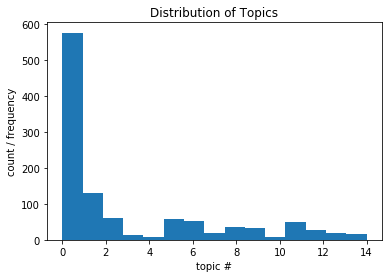

In [112]:
plt.hist(a, n_components)
plt.xlabel('topic #')
plt.ylabel('count / frequency')
plt.title('Distribution of Topics')

# look up some samples to check topics

In [113]:
len(blurbs)

1106

In [115]:
blurbs[:1]

['The playful experimentation with perspective and proportions in this depiction of men and boys absorbed in various tasks related to furniture manufacture fills the canvas with frenetic energy. Details, such as the wide range of tools and machinery that animate the interior, reveal Usui’s own extensive knowledge of woodworking. Following his immigration to New York from Japan, Usui integrated into the city’s art community through his trade as a frame maker, through which he met many leading contemporary painters.']

In [116]:
len(data)
print(type(data))

<class 'list'>


In [117]:
data[0]

defaultdict(dict,
            {'AccessionNumber': '2014.142',
             'Artist': 'Bumpei Usui (American (born Japan), Nagano 1898–1994 New York)',
             'Blurb': 'The playful experimentation with perspective and proportions in this depiction of men and boys absorbed in various tasks related to furniture manufacture fills the canvas with frenetic energy. Details, such as the wide range of tools and machinery that animate the interior, reveal Usui’s own extensive knowledge of woodworking. Following his immigration to New York from Japan, Usui integrated into the city’s art community through his trade as a frame maker, through which he met many leading contemporary painters.',
             'Date': '1925',
             'Medium': 'Oil on canvas'})

# Artist

In [118]:
nArtists=0 #count of artists
artistsWBlurb=[] #list of artists

for entry in range(len(data)):
    if len(data[entry]['Blurb']) > 0:
        #print(nArtists)
        #print(data[entry]['Artist'])
        artistsWBlurb.append(data[entry]['Artist'])
        nArtists+=1
nArtists        

1106

In [119]:
artistList=[]

for artist in artistsWBlurb:
    if isinstance(artist, str) == True:
        artist1=artist.split('(')[0]
        artist2=artist1.split(',')[0].strip()
        if artist2=='After Qi Baishi':
            artist2 = artist2.replace('After ','')
        if artist2=='Miniatures by Vassily Ivanovich Zuiev':
            artist2 = artist2.replace('Miniatures by ','')
        if artist2=='Unidentified Artist Chinese':
            artist2 = None
        if artist2=='Unidentified Artist':
            artist2 = None
        #print(artist2)
        artistList.append(artist2)
    else:
        artist2 = None
        artistList.append(artist2)
        
print(len(artistList))

1106


In [121]:
#view unique artists
#set(artistList)

In [122]:
len(set(artistList))

449

In [123]:
artistCounts = defaultdict(int)

for i in artistList:
    artistCounts[i] += 1
#print(artistCounts) 


In [124]:
artistHighCounts=[key for key in artistCounts.keys() if artistCounts[key]>10]
print(len(artistHighCounts))
print(artistHighCounts)
#####
#[##'Anselm Kiefer', ##'Fernand Léger', ##'Georges Braque', ##'Georgia O'Keeffe',
#       ##'Henri Matisse', ##'John Singer Sargent', ##'Louis Comfort Tiffany',
#       ##'Marsden Hartley', ##'Pablo Picasso', ##'Paul Klee', ##'Pierre Bonnard',
#       ##'Qi Baishi', ##'Xie Zhiliu', ##'Zhang Daqian'], + ##None --> 15
#####

15
['Xie Zhiliu', 'Pablo Picasso', None, 'Qi Baishi', 'Pierre Bonnard', 'Henri Matisse', 'Paul Klee', 'Georges Braque', 'Fernand Léger', 'Anselm Kiefer', 'Zhang Daqian', 'Louis Comfort Tiffany', "Georgia O'Keeffe", 'John Singer Sargent', 'Marsden Hartley']


In [125]:
artistList2=[]

for artist in artistsWBlurb:
    if isinstance(artist, str) == True:
        artist1=artist.split('(')[0]
        artist2=artist1.split(',')[0].strip()
        if artist2=='After Qi Baishi':
            artist2 = artist2.replace('After ','')
        if artist2=='Miniatures by Vassily Ivanovich Zuiev':
            artist2 = artist2.replace('Miniatures by ','')
        if artist2=='Unidentified Artist Chinese':
            artist2 = None
        if artist2=='Unidentified Artist':
            artist2 = None
        if artist2 not in artistHighCounts:
            artist2 = None
        #print(artist2)
        artistList2.append(artist2)
    else:
        artist2 = None
        artistList2.append(artist2)
        
print(len(artistList2))

1106


In [126]:
tpdummies=pd.get_dummies(artistList2)
print(tpdummies.columns)
print(tpdummies.head())

Index(['Anselm Kiefer', 'Fernand Léger', 'Georges Braque', 'Georgia O'Keeffe',
       'Henri Matisse', 'John Singer Sargent', 'Louis Comfort Tiffany',
       'Marsden Hartley', 'Pablo Picasso', 'Paul Klee', 'Pierre Bonnard',
       'Qi Baishi', 'Xie Zhiliu', 'Zhang Daqian'],
      dtype='object')
   Anselm Kiefer  Fernand Léger  Georges Braque  Georgia O'Keeffe  \
0              0              0               0                 0   
1              0              0               0                 0   
2              0              0               0                 0   
3              0              0               0                 0   
4              0              0               0                 0   

   Henri Matisse  John Singer Sargent  Louis Comfort Tiffany  Marsden Hartley  \
0              0                    0                      0                0   
1              0                    0                      0                0   
2              0                    0       

# Medium

In [127]:
nMedia=0 #count of media
mediaWBlurb=[] #list of media

for entry in range(len(data)):
    if len(data[entry]['Blurb']) > 0:
        #print(nMedia)
        #print(data[entry]['Medium'])
        mediaWBlurb.append(data[entry]['Medium'])
        nMedia+=1
nMedia

1106

In [128]:
print(len(mediaWBlurb))
print(mediaWBlurb[:5])

1106
['Oil on canvas', 'Hanging scroll; ink and color on paper', 'Oil and newspaper transfer on canvas', 'Sheet from a sketchbook; pencil on paper', 'Hanging scroll; ink and color on paper']


In [130]:
words_to_remove=(['hanging', 'mounted', 'board', 'folding'])
custom_stop_words = text.ENGLISH_STOP_WORDS.union(words_to_remove)

cv=CountVectorizer(mediaWBlurb,stop_words=custom_stop_words)
cv_fit=cv.fit(mediaWBlurb)
cv_transform=cv.transform(mediaWBlurb)
#print((cv_fit.vocabulary_))

# Vocabulary
vocab = list(cv_fit.get_feature_names())
#print((vocab))

# Column-wise sum of the X matrix
counts = cv_transform.sum(axis=0).A1 #A1 returns flattened array
#print(counts)

freq_distribution = Counter(dict(zip(vocab, counts)))
print(freq_distribution.most_common(20))

[('oil', 570), ('canvas', 529), ('paper', 410), ('ink', 294), ('gouache', 142), ('watercolor', 137), ('color', 124), ('scroll', 102), ('graphite', 73), ('album', 68), ('acrylic', 61), ('leaf', 59), ('drawing', 51), ('pencil', 46), ('charcoal', 42), ('fan', 39), ('alum', 37), ('ivory', 35), ('cardboard', 34), ('masonite', 31)]


In [131]:
materials=[]

for i in range(20):
    material=freq_distribution.most_common(20)[i][0]
    materials.append(material)
print(materials)    

['oil', 'canvas', 'paper', 'ink', 'gouache', 'watercolor', 'color', 'scroll', 'graphite', 'album', 'acrylic', 'leaf', 'drawing', 'pencil', 'charcoal', 'fan', 'alum', 'ivory', 'cardboard', 'masonite']


In [132]:
mediaWBlurb[0]

'Oil on canvas'

In [133]:
cv_transform

<1106x321 sparse matrix of type '<class 'numpy.int64'>'
	with 3870 stored elements in Compressed Sparse Row format>

In [134]:
vocab = list(cv.get_feature_names())
print(vocab[:5])

['academy', 'accordion', 'acrylic', 'adhered', 'adhesive']


In [135]:
d = Counter(mediaWBlurb)

n, m = d.keys(), d.values()
#print(n, m)

In [136]:
#d

# Date

In [143]:
nDate=0 #count of dates
DatesWBlurb=[] #list of dates

#for entry in range(len(data)):
#    if isinstance(data[entry]['Date'],str)==True:
#        if len(data[entry]['Blurb']) > 0:
#            print(nDate)
#            print(data[entry]['Date'])
#            DatesWBlurb.append(data[entry]['Date'])
#            nDate+=1
#    else:
#        print(None)
#nDate        

In [141]:
data[60]['Date']